In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
import pandas as pd
from datetime import datetime
from sklearn.decomposition import PCA

In [2]:
# Load the Fashion-MNIST dataset
df = pd.read_csv('Data/output.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 16385 entries, 0 to label
dtypes: int64(16384), object(1)
memory usage: 375.0+ MB


In [15]:
df.shape

(3000, 16385)

In [3]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
276,92,92,92,93,96,102,109,116,120,122,...,109,109,109,109,110,110,110,110,110,class_0
162,104,104,104,103,99,93,84,77,71,70,...,157,157,157,157,157,157,157,157,157,class_0
1225,84,84,84,83,82,79,76,74,73,74,...,89,89,89,90,90,90,90,90,90,class_4
550,80,80,80,81,86,91,96,98,98,95,...,69,67,73,85,97,105,108,108,108,class_1
4,83,83,83,80,76,72,70,73,77,82,...,92,90,90,90,88,87,87,86,86,class_0


In [6]:
# Trộn (shuffle) index của DataFrame
df = df.sample(frac=1, random_state=42)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
1801,77,77,77,74,67,56,51,53,64,76,...,89,89,89,89,89,89,89,89,89,class_6
1190,98,98,98,98,95,91,86,82,77,76,...,91,91,90,90,90,90,90,90,90,class_3
1817,80,80,80,79,77,74,72,70,70,70,...,92,92,92,92,92,92,92,92,92,class_6
251,102,102,102,102,101,99,96,93,90,89,...,97,97,96,95,95,95,95,95,95,class_0
2505,93,93,92,86,76,61,53,56,63,70,...,98,96,95,97,99,103,105,105,105,class_8


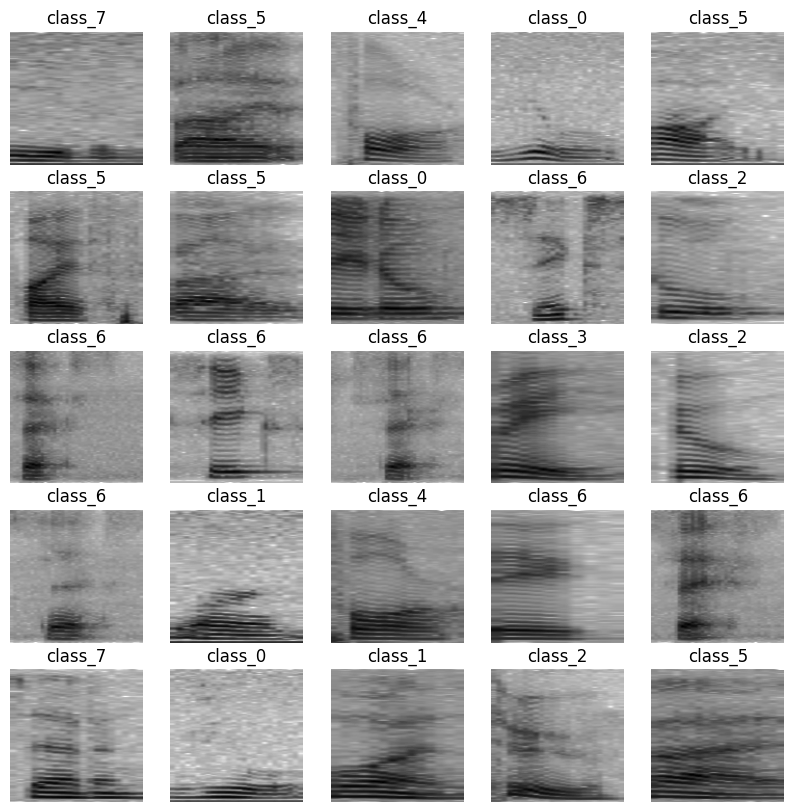

In [10]:
# Display 25 random images from the training set
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
random_images = np.random.randint(0, df.shape[0], size=25)
for i, axi in enumerate(ax.flat):
    img = df.drop(['label'], axis=1).values[random_images[i]].reshape(128, 128)
    axi.imshow(img, cmap='gray_r')
    axi.set_title(df.iloc[random_images[i], -1])
    axi.axis('off')
plt.show()

In [11]:
# Min, max values of all images
print(f"Min: {df.drop(['label'], axis=1).values.min()}")
print(f"Max: {df.drop(['label'], axis=1).values.max()}")

Min: 30
Max: 215


In [12]:
X = df.drop(['label'], axis=1).values
y = df['label'].values

In [13]:
# Scale the data
X = X / 215.0   # Note: we divide by 255.0 instead of 255

### Yêu cầu 1: xây dựng mô hình Support vector machine

In [14]:
from sklearn.model_selection import train_test_split 

In [ ]:
svc_time_start=datetime.now()
print(svc_time_start)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Create a SVM model
svm_model = SVC(kernel='linear')

In [21]:
# Fit the model
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [22]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [24]:
# Evaluate the model
print(f'Accuracy of the SVM model on the test set: {svm_model.score(X_test, y_test) * 100:.2f}%')
print(f'Accuracy of the SVM model on the training set: {svm_model.score(X_train, y_train) * 100:.2f}%')

Accuracy of the SVM model on the test set: 96.44%


KeyboardInterrupt: 

<Axes: >

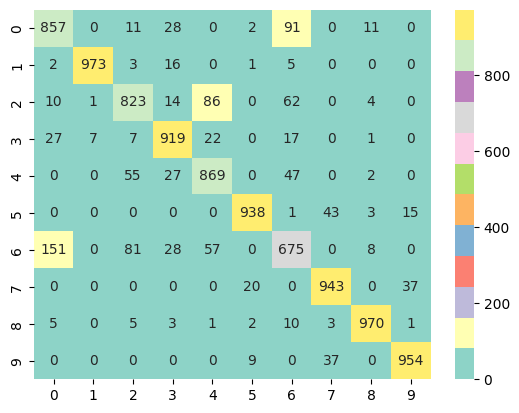

In [35]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Set3')

In [36]:
# Create a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.82      0.83      1000
           3       0.89      0.92      0.90      1000
           4       0.84      0.87      0.85      1000
           5       0.97      0.94      0.95      1000
           6       0.74      0.68      0.71      1000
           7       0.92      0.94      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
# Model Precision: what percentage of positive tuples are Labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are Labeled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))


Precision: 0.9818181818181818
Recall: 1.0


Text(0, 0.5, 'Cumulative explained variance')

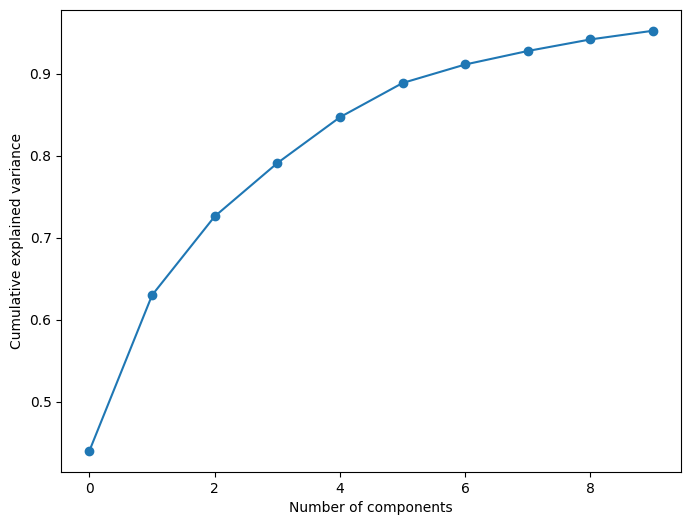

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
svc_time_end=datetime.now()
print(svc_time_end)
svc_time = svc_time_end-svc_time_start
print('Mô hình SVC chạy tốn: ', svc_time)

### Yêu cầu 2: Support vector machine với PCA

In [ ]:
svc_pca_time_start=datetime.now()
print(svc_pca_time_start)

In [ ]:
pca = PCA(0.95)

In [ ]:
pca.fit(X_train)

PCA(n_components=0.95)

In [ ]:
pca.n_components_

10

In [ ]:
# Apply the mapping (transfbrm) to both the training set and the test set.
x_train = pca.transform(X_train)
x_test = pca.transform(X_test)

In [ ]:
svm_pca_model = SVC(kernel='linear')

In [ ]:
# Fit the model
svm_pca_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions
y_pred = svm_pca_model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
# Evaluate the model
print(f'Accuracy of the SVM model on the test set: {svm_pca_model.score(X_test, y_test) * 100:.2f}%')
print(f'Accuracy of the SVM model on the training set: {svm_pca_model.score(X_train, y_train) * 100:.2f}%')

Accuracy of the SVM model on the test set: 98.83%
Accuracy of the SVM model on the training set: 98.24%


<Axes: >

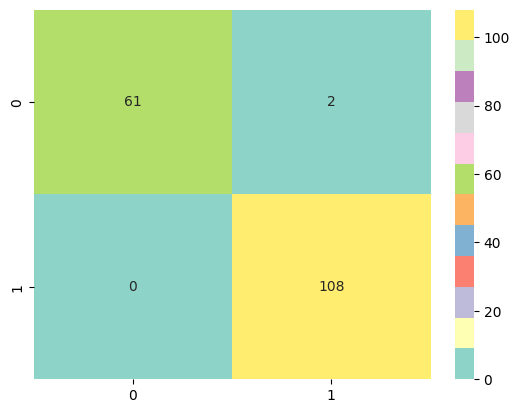

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Set3')

In [ ]:
# Create a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [ ]:
svc_pca_time_end=datetime.now()
print(svc_pca_time_end)
svc_pca_time = svc_pca_time_end-svc_pca_time_start
print('Mô hình SVC sau PCA chạy tốn: ', svc_pca_time)

In [ ]:
# Model Precision: what percentage of positive tuples are Labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are Labeled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))


Precision: 0.9818181818181818
Recall: 1.0


Text(0, 0.5, 'Cumulative explained variance')

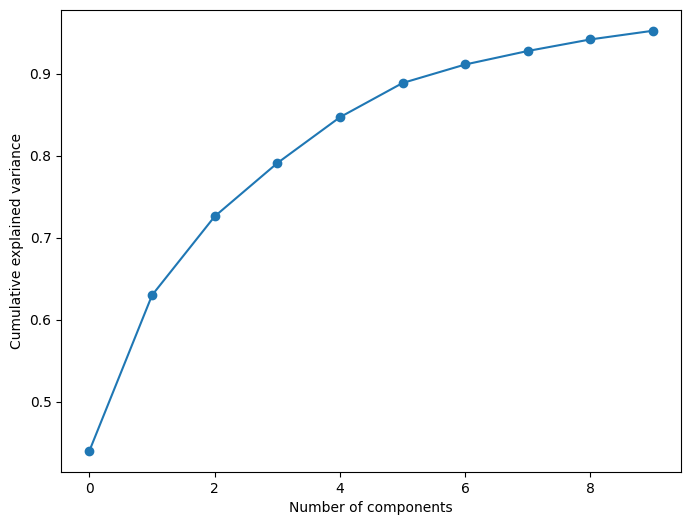

In [25]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

#### So sánh thời gian thực hiện trước và sau khi áp dụng PCA.

In [ ]:
print('Mô hình SVC sau PCA chạy tốn: ', svc_time)
print('Mô hình SVC sau PCA chạy tốn: ', svc_pca_time)

Nhận xét: 